# Wrangling report on WeRateDogs Tweeter Archive

   
   
   >***Author:*** *Indranil Mondal*    
   >***Date:*** *25th Sept, 2022*

### Introduction
One of the most important criteria to have a very good prediction out of machine learning is the quality of data given as input to the algorithm. Real-world data collected either manually or electronically most often comes with unclean dirty data. Data scientist's job is to clean the data which is painful and tidious. However, they get every possible help they can from huge python library for programmetic assessment. The process of gathering data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it is called data wrangling.

Here in this project, I will be wrangling (and analyzing and visualizing) the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for people like us to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

Goal is to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations. We will cover these stpes below.

### Project Overview
Requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in gathered  dataset. Obviously, first need to gather the data, which is partially kind of done by Udacity, Just need to import that data which are stored in different format. Tasks for this project are as follows:
* Data Wrangling
    * Gathering data
    * Assessing data
    * Cleaning data

* Storing, Analyzing, and visualizing data

* Reporting

#### Step 1: Gathering data

The very first step of data wrnagling effort is to collect all possible data related to the topic on which a datascientist is working. Collecting data can be overwhelming sometimes. Data stored in different places and in different format. Collecting them requires different tricks and techniques. Then to unify all of them in a common format so that you can play around with all dataset with relative ease and find out meaningful insights. Luckily, Udacity partially gathered data for me.

>**Enhanced Twitter Archive:** The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which Udacity used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, Udacity filtered tweets with ratings only (there are 2356).

>**Additional Data via the Twitter API:** In Twitter archives - retweet count and favorite count are missing which needs to be extracted from Twitter using Twitter's API. I had to create twitter account and then creating a profile in twitter developer portal with elevated rights inorder to fetch data from Twitter using Tweepy.

>**Image Predictions File:** Udacity curated image prediction dataset by extracting all images from twitter archive and applying _Neural Network_ alogorithm on them to predict Dog's breed. This additional data we will have to import and use.

### Step 2: Assessing data
Next come assessing the gathered data. I had to look for two types of unclean data:
* **Dirty data**, also known as **low quality data**. Low quality data has content issues.
* **Messy data**, also known as **untidy data**. Untidy data has **structural issues**.

Methods I used to find data issues include both **Visual** and **Programmatic** assements. Findings from Visual assements included both Tidiness issues(e.g Dog stages values are considered as Columns, Rating Column distributed over two) as well as quality issues (e.g Dog Names, Predicted Breed names does not conform to consistent Pattern, Wrong Dog names, Predicted Dog breed is not a dog breed). Programmatic assessment revealed quite a number of data qulity issue too. In the end I came up with below findings:

#### Quality issues
* ##### WeRateDogs Twitter Archive
    * Datetime fields are stored as object instead of datetime.    
    * The dog names format should be consistent. Capitalize.
    * Replace 'None' with np.nan to indicate the missing values.
    * Dogs classified as more than one type(doggo, floofer, pupper and puppo) in some cases. 
    * Denominator with value other than 10.
    * Numerator with value of 0.
* ##### Image Predictions
    * Non descriptive column name.(Image Predictions)
    * The prediction dog breed names formatting incosistent.
    * Many Predicted names in dog breed prediction are not likely to be a dog.
* ##### Tweet Status
    * Remove all columns not needed.


#### Tidiness issues
* The columns doggo, floofer, pupper and puppo need to be merged together to form a single column. These are values converted into columns.

* Rename the column **id** to **tweet_id** in tweetStatus and **timestamp** to **created_at** in tweetArchive

* Drop columns that are not needed for our analysis.

* Twiiter archive and status data can be consolidated and merged together to have a well formed observation set as they together form the observation. For that matter, we can add dog breed prediction too, without much overhead as we will keep only the original tweets.

* Dogs rating numerator and denominator are stored seprately, which is not ideal. Rating should be one single column and for that matter Ratings can come in decimal.

#### Step 3: Cleaning data
Cleaning of the data sets based on findings from **Assesing Data** are done in this step. For each and every findings, I repeated Defining, Coding and testing of the clean up. Define is a very important steps as this acutall ellaborate a bit more on my findings as to how to address the issue. Worthwhile to mention, Cleaning up one issue at times resolved another data quality issues and sometimes I found it is intertwined between **Tidiness** and **Data Quality issue**. Solving one solved other. At time I also found one is dependent upon another. In order to address Tidiness issue I had to first address Quality issue. This might be due to the fact I am not experienced enough to qualify issues under correct category. However, this steps made me go through different panda function to explore, I thoroughly enjoyed this part. I am still having trouble remembering the syntax but I suppose that will come with more and more practice.

Before doing any cleanup though, made a copy of the original and workd on the copied data, so to preserve the originals, In case I have to refer to them again. Main learnings from this steps are how to renaming a cloumn, changing datatypes of columns, Manipulating strings in panda, droping rows/ columns handling Nan/null. Most importantly, I kind of developed an eye and intuition on the data and how to approch it. The more time I spent, more fluent I became.

#### Step 4: Storing data

The cleaned up data could habe been stored as different dataset, but I felt and was also suggested by Udacity store them in a single dtaset by combining all three cleaned up datasets into a master. This enabled me to analyze the data efficiently and with relative ease I would say. I had to join all three dataframes on common column i.e **tweet_id** to create the twitter_archive_master.csv. Please note evethough we started with a lot more data in all three of them, after cleaning and joining them together I have a lot less data(1532) but with good quality.

#### Step 5: Analyzing, and visualizing data
In this step I had to analyse the clean consolidated data and make meaningfull insight which adds value to Dog lovers community. Well, this part was not as easy I thought it would be. Infact spend hours to figure what possibly could I infere from the data. Few were easy ones and probably would have been enough for me draw a curtain on this project. Instead I went on to see what else can I make out of it. Being a dog lover myslef actually intriuged me. To my surprise, I had to revisit how twitter schema works to find out about re-tweet, favourite and certain shortcomings on my knowledge on how twitter work. Believe it or not, I created my twitter account just for this project, You may call me (old fashoined for that). Finally I made few interesting insights, which I certainly think are correct ones. I amde a big assumption here that neural network algorithm did its job prety well. I manually verified few of the prediction by looking at the images and was satisfied by the prediction.

> ##### Insights:
There are many insights can be inferred based on the analysis done on cleaned and consolidated data. Many more can still be recovered by experienced data scientist by analysis. But from my little experince and the analysis done, here is what I can say
1. Most loved(favourited)/ re-tweetd dog breed are the ones that are adopted most by people as pet.
2. Highest rated dogs are not the most famous ones (favourited/re-tweeted).
3. People tends to mark tweet as faovourite than re-tweeting them.
4. It is highly likely that more the favourite count, higher the chanes of it being re-tweeted.
5. There are dog breeds predicted with higher confidenece and some are having lower confidence level. This indicates that those which are easily identifiable has some distinct features. On the other hand some breed has very common features between them which probably lead to lower confidence. Here, I think it was a mistake to drop other p2 and p3 columns from prediction tabel. I assume the confidence are evenly distributed between 3 prediction.


Lets have a look at insights and inspect them one by one. For the sake of showing these figures in here, I will have to import below library. But we can ignore these technical details and focus one what can be aceived through dta science.

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline
# figure size in inches optional
rcParams['figure.figsize'] = 20 ,15

**Dog breed that people prefer as pet:** If we look at the tweet count for each predicted dog breed, we can easily establish  which one is preferred by people the most and least as pet dog. Grouping on predicted breed and counting the tweet_id gives us what we need. Below you will find top 5 and bottom 5 dogs breed. From these we can easily point out that people prefer Golden retriver as most preferred breed as pet dog. 


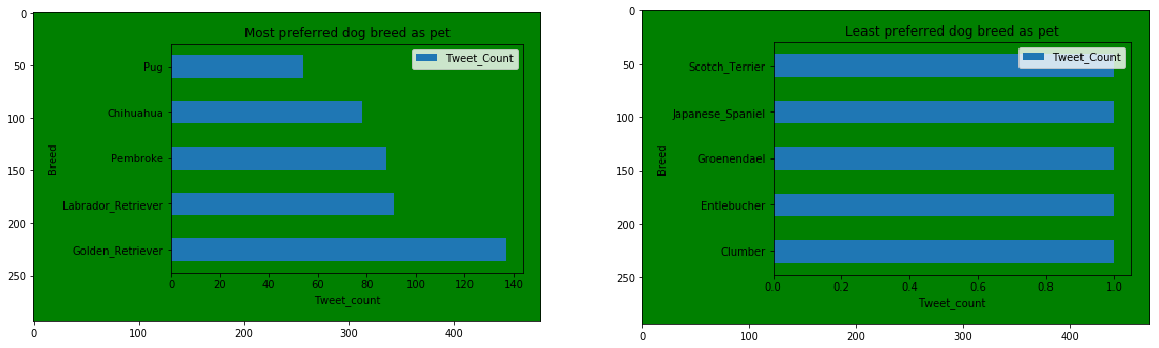

In [21]:
# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(mpimg.imread('./most_preferred_dog_breed.png'))
ax[1].imshow(mpimg.imread('./least_preferred_dog_breed.png'))

**Most loved and re-tweeted dog breed:** Now, lets have a look at the most loved and re-tweeted dogs. What we see that favourite count(aggregated) for a breed is much hogher than aggregated re-tweet count. This implies, people prefer to mark certain tweet favourite more often than they re-tweet them. It is a human trend/behaviour. Another fact is that dog breeds apper in both most favoured and most-retweeted are same. 3 out of least favoured dog breed too appear in least re-tweeted dog breed list. This points out to a strong co-rrelation between them.

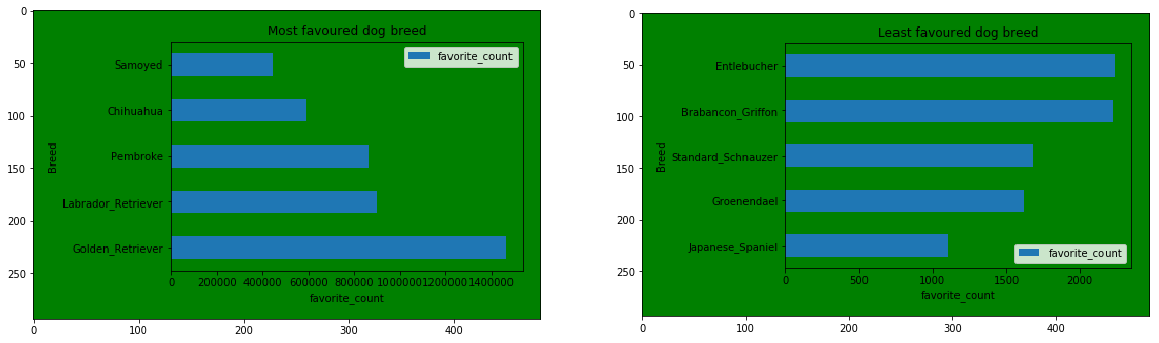

In [27]:
# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(mpimg.imread('./most_favoured_dog_breed.png'))
ax[1].imshow(mpimg.imread('./least_favoured_dog_breed.png'))

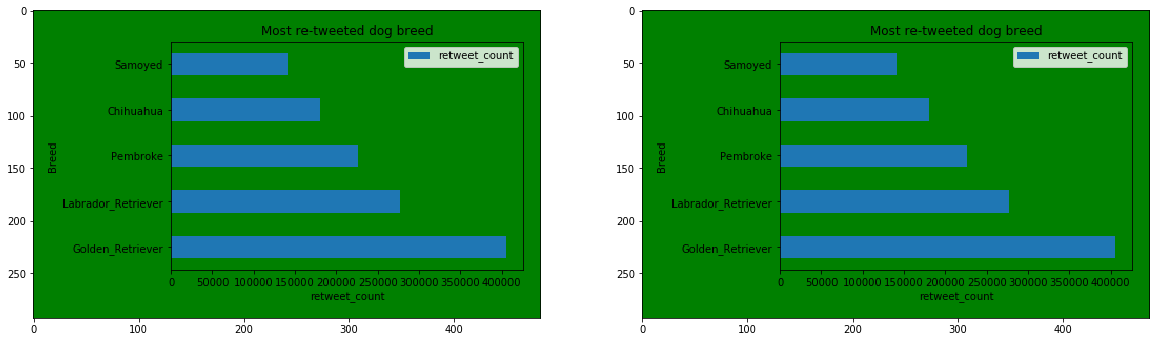

In [26]:
# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(mpimg.imread('./most_re-tweeted_dog_breed.png'))
ax[1].imshow(mpimg.imread('./least_re-tweeted_dog_breed.png'))

**Co-rrelation between favourite count,re-tweet count, rating and confidence:** Now lets have a look at the co-rrelation between different numerical fields present in master archive. Below figure points out that very high value between favourite count and re-tweet count, but not so in case of other two. This means tweet having high favourite count has higher chance of being re-tweeted and vice-versa. Dogs rating has little to no beasing on a tweet being re-tweetd/ favoured. As the highest rated dog are not featured in list of favoured/re-tweeted list.

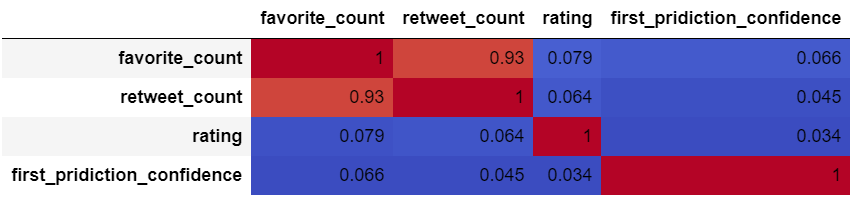

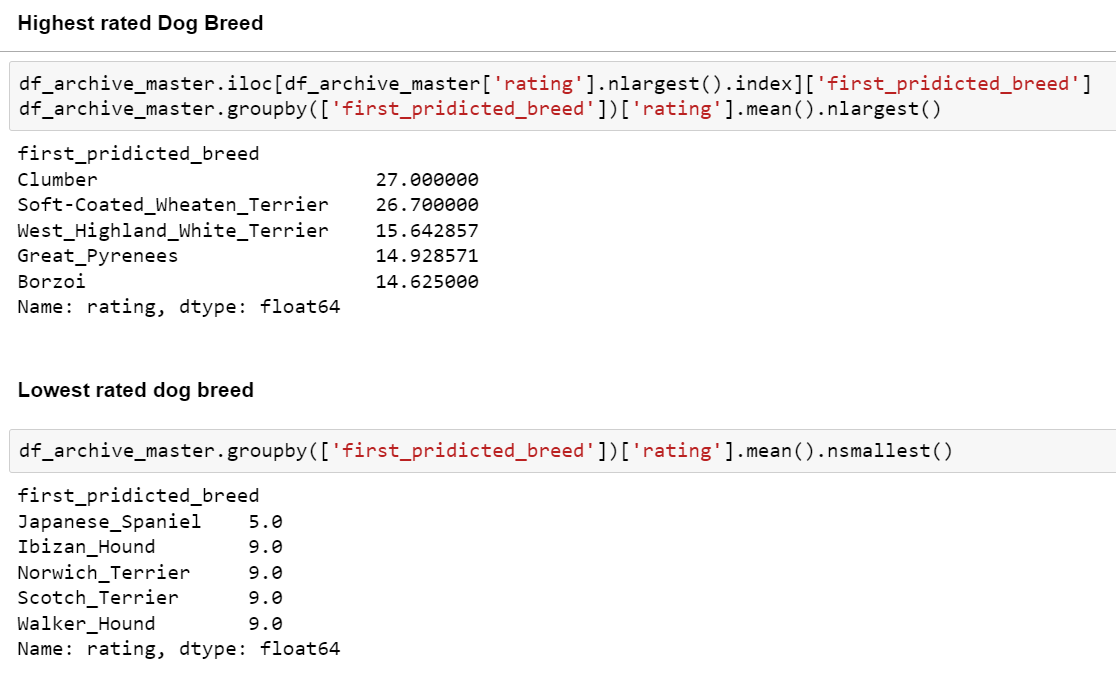

**Predicted Confidence Level:** Finally, lets have a look at breed's confidence level while being predicted by _neural network_ . Some breed has a very high value whereas some has pretty low value. Which made me wonder why. They I looked at few of the pictures of these breed and the twitter image. on Manual inspection it revelas that breed with high confidence level has distinct features that set them apart form the rest. There are others having features common between them which means confidence level is low in idenifying and categorizing to a specific breed.

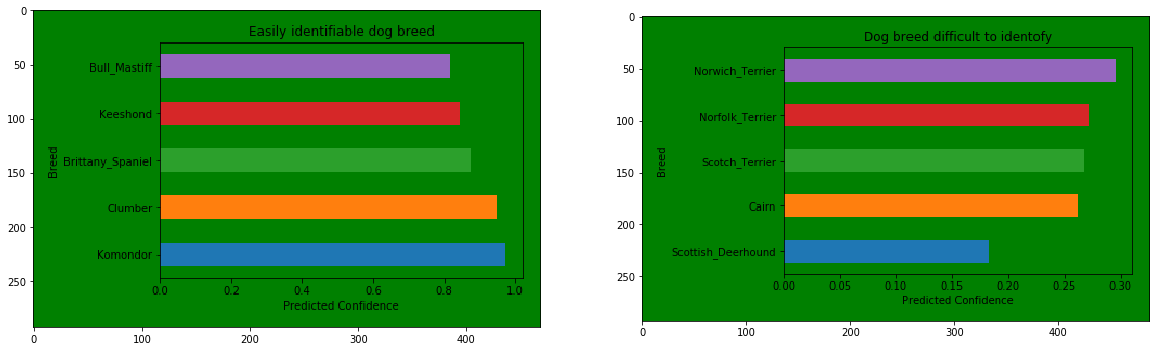

In [25]:
# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(mpimg.imread('./breed_easily_identifiable.png'))
ax[1].imshow(mpimg.imread('./breed_not_easily_identifiable.png'))

### Closure
When I started this project after going through the learnings, I thought it would be peice of cake and soon realize how wrong I was. I never had paid attention to those who does this dirty job of cleaning data. Now I would not think of them as lowly. It was quite journey thorugh the project - and I leanred quite a lot of new things. I hope to use them in future. It takes time to build a nack for data as it takes time to aquire the test of beer.

#### References:
Here are some of the site from where I gathered a lot of information as how to approach a certain problem.
* https://pandas.pydata.org/docs/reference/
* https://stackoverflow.com/
* https://www.kaggle.com/
* https://towardsdatascience.com/
* https://www.geeksforgeeks.org/
* https://sparkbyexamples.com/